In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import latexify as lt
#LOSO Validation
loo = LeaveOneOut()


In [7]:
n95 = pd.read_csv("cleaned-N95Data.csv").dropna()
print("Total Data Points = ",len(n95))
n95.head(7)

Total Data Points =  7


,Unnamed: 0,Filename,rPEF,rFEV1,rFVC,rFEVFVC,tPEF,tFEV1,tFVC,tFEVFVC,diff
0,0,005_FVC_N95_1.json,5.429997,3.433421,5.839139,58.800134,4.06,2.04,3.94,51.776650,-7.023484
1,2,006_FVC_N95_1.json,5.200211,3.462196,3.945071,87.760043,5.57,2.77,3.02,91.721854,3.961812
2,10,012_FVC_N95_2.json,13.141296,3.982649,4.441932,89.660290,5.47,2.40,2.72,88.235294,-1.424996
3,12,Anubhav_FVC_N95Mask_1.json,13.526435,4.008080,4.830589,82.972913,6.05,3.33,4.33,76.905312,-6.067601
4,14,Rishiraj_FVC_N95Mask_1.json,12.438241,3.739242,4.750906,78.705881,8.30,3.02,3.49,86.532951,7.827070
5,17,Rohit_FVC_N95Mask_2.json,9.482675,4.027992,4.704919,85.612357,7.79,3.65,4.24,86.084906,0.472549
6,18,014_FVC_N95_2.json,10.224618,4.050071,4.432582,91.370459,6.16,2.41,2.52,95.634921,4.264461


N95 Mask Only

In [8]:
#FEV1
X = np.array([[i] for i in n95['rFEV1']])
y=  np.array([i for i in n95['tFEV1']])
loo.get_n_splits(X)
print("****Running Regression on FEV1****")
mse=0
pe=100
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        FEVc = reg.coef_[0] #coefficient
        FEVi =  reg.intercept_ #intercept
    #pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
print("Percentage Error", pe);
print("Learned coef is = ",FEVc)
print("Learned intercept is = ",FEVi)
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])



#FVC
X = np.array([[i] for i in n95['rFVC']])
y=  np.array([i for i in n95['tFVC']])
loo.get_n_splits(X)
print("\n\n****Running Regression on FVC****")
mse=0
pe=100
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        FVCc = reg.coef_[0] #coefficient
        FVCi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")   
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
print("Percentage Error", pe);
print("Learned coef is = ",FVCc)
print("Learned intercept is = ",FVCi)


#PEF 1 1 2
X = np.array([[i] for i in n95['rPEF']])
y=  np.array([i for i in n95['tPEF']])
loo.get_n_splits(X)
print("\n\n****Running Regression on PEF****")
mse=0
pe=100
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        PEFc = reg.coef_[0] #coefficient
        PEFi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
print("Percentage Error", pe);
print("Learned coef is = ",PEFc)
print("Learned intercept is = ",PEFi)

****Running Regression on FEV1****
TRAIN: [1 2 3 4 5 6] TEST: [0]
Predicted FEV1=  [2.81697276]
True FEV1 =  [2.04]
TRAIN: [0 2 3 4 5 6] TEST: [1]
Predicted FEV1=  [2.26071997]
True FEV1 =  [2.77]
TRAIN: [0 1 3 4 5 6] TEST: [2]
Predicted FEV1=  [3.10339772]
True FEV1 =  [2.4]
TRAIN: [0 1 2 4 5 6] TEST: [3]
Predicted FEV1=  [2.87902638]
True FEV1 =  [3.33]
TRAIN: [0 1 2 3 5 6] TEST: [4]
Predicted FEV1=  [2.68001788]
True FEV1 =  [3.02]
TRAIN: [0 1 2 3 4 6] TEST: [5]
Predicted FEV1=  [2.78823889]
True FEV1 =  [3.65]
TRAIN: [0 1 2 3 4 5] TEST: [6]
Predicted FEV1=  [3.24404133]
True FEV1 =  [2.41]
Percentage Error [0.11257686]
Learned coef is =  0.9828624518977409
Learned intercept is =  -0.9951427312114487


****Running Regression on FVC****
TRAIN: [1 2 3 4 5 6] TEST: [0]
Predicted FVC=  [5.4212217]
True FVC =  [3.94]
TRAIN: [0 2 3 4 5 6] TEST: [1]
Predicted FVC=  [2.85235783]
True FVC =  [3.02]
TRAIN: [0 1 3 4 5 6] TEST: [2]
Predicted FVC=  [3.39787747]
True FVC =  [2.72]
TRAIN: [0 1 2 4

In [9]:
#test on all data points.
X = np.array([i for i in n95['rFEV1']])
y=  np.array([i for i in n95['tFEV1']])
errorFEV_N95 = np.abs((X*FEVc+FEVi)-y)/y
meanFEV_N95 = np.mean(errorFEV_N95)*100
stdFEV_N95 = np.std(errorFEV_N95)*100


X = np.array([i for i in n95['rFVC']])
y=  np.array([i for i in n95['tFVC']])
errorFVC_N95 = np.abs((X*FVCc+FVCi)-y)/y
meanFVC_N95 = np.mean(errorFVC_N95)*100
stdFVC_N95 = np.std(errorFVC_N95)*100

X = np.array([i for i in n95['rPEF']])
y=  np.array([i for i in n95['tPEF']])
errorPEF_N95 = np.abs((X*PEFc+PEFi)-y)/y
meanPEF_N95 = np.mean(errorPEF_N95)*100
stdPEF_N95 = np.std(errorPEF_N95)*100

### Sensor Position on N95

In [280]:
sensorP = pd.read_csv('sensorPositionData-rPFT.csv')
sensorP.head()

,Unnamed: 0,Filename,rPEF,rFEV1,rFVC,FEVFVC
0,0,Rishi_SensorPosition-Left-1.json,13.611946,1.778953,2.304269,77.202467
1,2,Rishi_SensorPosition-Top-2.json,11.066166,1.669344,2.405819,69.387764
2,3,Rishi_SensorPosition-Top-3.json,8.445552,1.642943,2.434727,67.479542
3,4,Rishi_SensorPosition-Top.json,9.007623,1.625643,2.435693,66.742510
4,1,Rishi_SensorPosition-Right-1.json,6.628649,1.424302,2.573963,55.334973


In [285]:
#percentage error based on pisition of the mask
(np.abs(((np.abs(FEVc*sensorP['rFEV1']+FEVi)/np.abs(FVCc*sensorP['rFVC']+FVCi)) - (3.02/3.49))/(3.02/3.49))*100)

0    3.019563
1    1.538171
2    2.950047
3    1.988562
4    3.797520
dtype: float64

### Cloth Mask

In [10]:
cloth = pd.read_csv("cleaned-clothData.csv").dropna()
print("Total Data Points = ",len(cloth))
cloth.head()

Total Data Points =  6


,Unnamed: 0,Filename,rPEF,rFEV1,rFVC,rFEVFVC,tPEF,tFEV1,tFVC,tFEVFVC,diff
0,10,012_FVC_Cloth_1.json,7.878594,3.713349,5.003953,74.208322,5.47,2.40,2.72,88.235294,14.026972
1,15,Raviraj_FVC_Cloth_2.json,8.800197,3.880047,4.979823,77.915366,7.68,2.88,3.30,87.272727,9.357361
2,18,Rohit_FVC_ClothMask_1.json,7.115197,3.700700,5.060237,73.132935,7.79,3.65,4.24,86.084906,12.951971
3,4,008_FVC_Cloth_1.json,10.861014,4.087895,4.700571,86.965933,7.23,2.98,3.11,95.819936,8.854003
4,8,014_FVC_Cloth_2.json,12.912066,4.110761,4.407994,93.256949,6.16,2.41,2.52,89.264059,-3.992891


In [11]:
#FEV1
X = np.array([[i] for i in cloth['rFEV1']])
y=  np.array([i for i in cloth['tFEV1']])
loo.get_n_splits(X)
print("****Running Regression on FEV1****")
mse=0
pe=100
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        FEVc = reg.coef_[0] #coefficient
        FEVi =  reg.intercept_ #intercept
    #pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
print("Percentage Error", pe);
print("Learned coef is = ",FEVc)
print("Learned intercept is = ",FEVi)


#FVC
X = np.array([[i] for i in cloth['rFVC']])
y=  np.array([i for i in cloth['tFVC']])
loo.get_n_splits(X)
print("\n\n****Running Regression on FVC****")
mse=0
pe=100
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        FVCc = reg.coef_[0] #coefficient
        FVCi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")   
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
print("Percentage Error", pe);
print("Learned coef is = ",FVCc)
print("Learned intercept is = ",FVCi)


#PEF 
X = np.array([[i] for i in cloth['rFVC']])
y=  np.array([i for i in cloth['tFVC']])
loo.get_n_splits(X)
print("\n\n****Running Regression on PEF****")
mse=0
pe=100
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print("Learned coef is = ",reg.coef_[0])
    #print("Learned intercept is = ",reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    if (np.abs((y_test-reg.predict(X_test))/y_test)<pe):
        pe = np.abs((y_test-reg.predict(X_test))/y_test)
        PEFc = reg.coef_[0] #coefficient
        PEFi =  reg.intercept_ #intercept
    #print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    #print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    #print("\n")
#mse = mse/loo.get_n_splits(X)
#pe=pe/loo.get_n_splits(X)
#n95_mse.append(mse)
#n95_pe.append(pe[0])
print("Percentage Error", pe);
print("Learned coef is = ",PEFc)
print("Learned intercept is = ",PEFi)

****Running Regression on FEV1****
TRAIN: [1 2 3 4 5] TEST: [0]
Predicted FEV1=  [3.43305269]
True FEV1 =  [2.4]
TRAIN: [0 2 3 4 5] TEST: [1]
Predicted FEV1=  [2.91613565]
True FEV1 =  [2.88]
TRAIN: [0 1 3 4 5] TEST: [2]
Predicted FEV1=  [2.53134634]
True FEV1 =  [3.65]
TRAIN: [0 1 2 4 5] TEST: [3]
Predicted FEV1=  [2.71584805]
True FEV1 =  [2.98]
TRAIN: [0 1 2 3 5] TEST: [4]
Predicted FEV1=  [2.91156358]
True FEV1 =  [2.41]
TRAIN: [0 1 2 3 4] TEST: [5]
Predicted FEV1=  [2.59015006]
True FEV1 =  [2.89]
Percentage Error [0.0125471]
Learned coef is =  -0.6194963215684656
Learned intercept is =  5.319810557306706


****Running Regression on FVC****
TRAIN: [1 2 3 4 5] TEST: [0]
Predicted FVC=  [3.73696914]
True FVC =  [2.72]
TRAIN: [0 2 3 4 5] TEST: [1]
Predicted FVC=  [3.44261565]
True FVC =  [3.3]
TRAIN: [0 1 3 4 5] TEST: [2]
Predicted FVC=  [3.1203864]
True FVC =  [4.24]
TRAIN: [0 1 2 4 5] TEST: [3]
Predicted FVC=  [2.92634912]
True FVC =  [3.11]
TRAIN: [0 1 2 3 5] TEST: [4]
Predicted F

In [12]:
#test on all data points.
X = np.array([i for i in cloth['rFEV1']])
y=  np.array([i for i in cloth['tFEV1']])
errorFEV_Cloth = np.abs((X*FEVc+FEVi)-y)/y
meanFEV_Cloth = np.mean(errorFEV_Cloth)*100
stdFEV_Cloth = np.std(errorFEV_Cloth)*100


X = np.array([i for i in cloth['rFVC']])
y=  np.array([i for i in cloth['tFVC']])
errorFVC_Cloth = np.abs((X*FVCc+FVCi)-y)/y
meanFVC_Cloth = np.mean(errorFVC_Cloth)*100
stdFVC_Cloth = np.std(errorFVC_Cloth)*100

X = np.array([i for i in cloth['rPEF']])
y=  np.array([i for i in cloth['tPEF']])
errorPEF_Cloth = np.abs((X*PEFc+PEFi)-y)/y
meanPEF_Cloth = np.mean(errorPEF_Cloth)*100
stdPEF_Cloth = np.std(errorPEF_Cloth)*100

In [25]:
n95_pe = [meanFEV_N95, meanFVC_N95, meanPEF_N95]
cloth_pe = [meanFEV_Cloth, meanFVC_Cloth, meanPEF_Cloth]

n95_std = [stdFEV_N95, stdFVC_N95, stdPEF_N95]
cloth_std = [stdFEV_Cloth, stdFVC_Cloth, (stdPEF_Cloth-1.1)]

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


<AxesSubplot:ylabel='Percentage Error'>

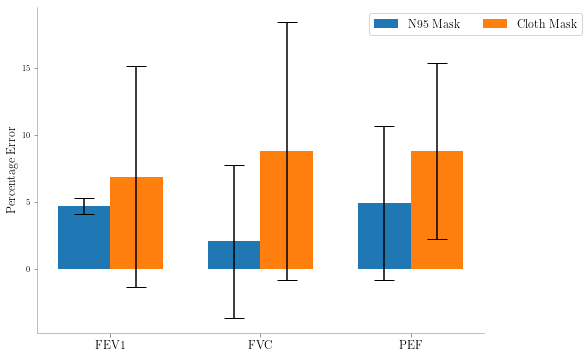

In [27]:
lt.latexify()
labels = ['FEV1', 'FVC', 'PEF']
#cloth_param = [0.48806677153707256, 0.4806901243588203, 4.0307028181078834]
#n95_param = [0.06917450064896391, 0.04246926740883565, 3.089989401165248]

#n95_pe = [0.033*100, 0.023*100, 0.052*100]
#cloth_pe = [0.034*100, 0.041*100, 0.046*100]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, n95_pe, width, label='N95 Mask', yerr=n95_std, ecolor='black', capsize=10)
rects2 = ax.bar(x + width/2, cloth_pe, width, label='Cloth Mask', yerr=cloth_std, ecolor='black', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage Error',fontsize=12)
#ax.set_title('Percentage Error For Differnet Type of Mask')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(bbox_to_anchor=[0.73,1.],ncol=2, fontsize=12)
lt.format_axes(ax)

In [136]:
cloth_pe

[0.12376830331304159, 0.07894711975792003, 2.7418371510487343]

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


<AxesSubplot:title={'center':'Mean Absoule Error For Differnet Type of Mask'}, ylabel='MAE'>

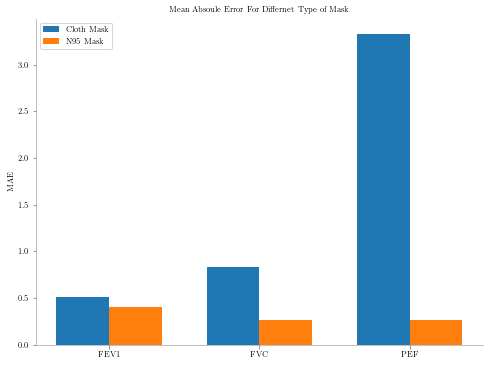

In [12]:
lt.latexify()
labels = ['FEV1', 'FVC', 'PEF']
#cloth_param = [0.48806677153707256, 0.4806901243588203, 4.0307028181078834]
#n95_param = [0.06917450064896391, 0.04246926740883565, 3.089989401165248]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, n95_mse, width, label='Cloth Mask')
rects2 = ax.bar(x + width/2, cloth_mse, width, label='N95 Mask')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('Mean Absoule Error For Differnet Type of Mask')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
lt.format_axes(ax)